In [6]:
import matplotlib.pyplot as plt
import pyautogui

In [7]:
x_datas = []
y_datas = []

In [8]:
with open("data.txt", "r") as file:
    for line in file:
        values = line.strip().split(',')

        x = float(values[0])
        y = float(values[1])

        x_datas.append(x)
        y_datas.append(y)

print("x : ", x_datas[:5])
print("y : ", y_datas[:5])


x :  [402.2734375, 417.6953125, 390.92578125, 392.34765625, 177.58203125]
y :  [308.09765625, 682.71875, 702.46484375, 697.4375, 165.21875]


In [9]:
screen_width, screen_height = pyautogui.size()

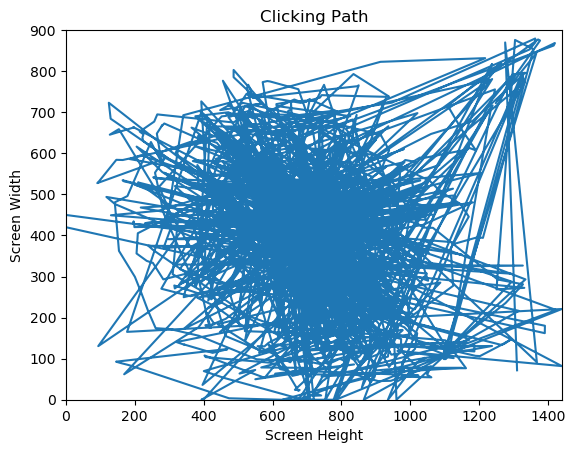

In [10]:
plt.figure()
plt.xlabel('Screen Height')
plt.ylabel('Screen Width')
plt.title('Clicking Path')

plt.xlim(0, screen_width)
plt.ylim(0, screen_height)

plt.plot(x_datas, y_datas)

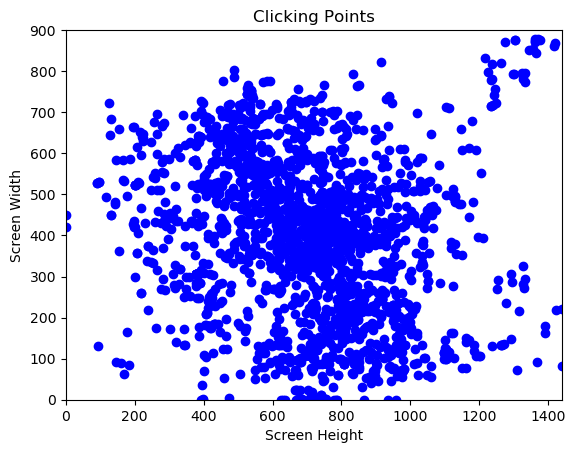

In [11]:
plt.figure()
plt.xlabel('Screen Height')
plt.ylabel('Screen Width')
plt.title('Clicking Points')

plt.xlim(0, screen_width)
plt.ylim(0, screen_height)

plt.scatter(x_datas, y_datas, marker='o', color='blue')